In [1]:
'''
Nechce se mi menit custom.css
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.CodeMirror { font-size: 12px !important; }</style>"))
'''
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.CodeMirror { font-size: 12px !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import os

In [3]:
sampling_freq = 150
path = '/compass/Shared/Users/bogdanov/vyzkumny_ukol'

runs_path = f'{path}/runs'

In [4]:
import os
import json

#Identify all runs.
#
runs = []
for root, dirs, files in os.walk('/compass/Shared/Users/bogdanov/vyzkumny_ukol/runs'):
    if root == '/compass/Shared/Users/bogdanov/vyzkumny_ukol/runs':
        runs.extend(dirs)
        break

#Identify all shots.
shot_usage = pd.read_csv('/compass/Shared/Users/bogdanov/vyzkumny_ukol/data/shot_usage.csv')
shots = list(shot_usage[(shot_usage['used_as']=='test') | (shot_usage['used_as']=='val')]['shot'].astype(int))

In [5]:
shot_usage

,shot,used_as,used_for_ris1,used_for_ris2,used_for_alt,comment
0,13182,test,False,False,True,jiny rozmer obrazku
1,16532,train,True,True,True,-
2,16534,test,True,True,True,-
3,16769,val,True,True,True,-
4,16773,test,True,True,True,-
5,16987,train,True,False,True,ruzny pocet obrazku
6,16989,train,True,False,True,ruzny pocet obrazku
7,17677,train,True,True,True,-
8,17714,test,False,False,False,Neoznaceny vyboj
9,17837,test,True,True,True,-


In [6]:

import visual



interactive(children=(Dropdown(description='run:', index=1, options=('24-04-30, 19-52-34 both, 2 classes, resn…

<function visual.visualize(path_to_run, shot, figure_vertical_size, figure_horizontal_size, zoom_signal, zoom_time, time_for_signal)>

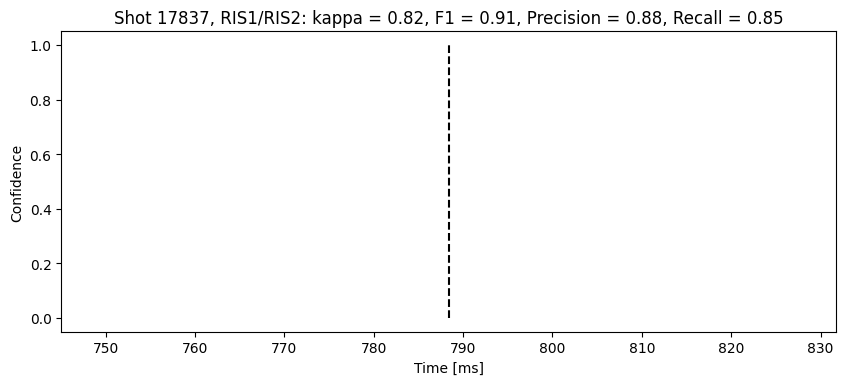

In [7]:

#path_to_csv = f'{path}/runs/24-04-30, 07-44-01 Simple1DCNN mc_h_alpha, no L-mode, weigth_decay=0.1, soft_labels/predictions_on_test_dset_df.csv'
widgets.interact(visual.visualize,
    path_to_run=widgets.Dropdown(
                    options=runs,
                    value=runs[1],
                    description='run:',
                    orientation='horizontal'),
    shot=widgets.Dropdown(
                    options=shots,
                    value=shots[5],
                    description='shot:',
                    orientation='horizontal'),
    zoom_signal=widgets.IntSlider(
                    min=0.1, max=99.9, step=1, 
                    value=0,
                    description='Zoom Signal:',
                    layout={'width': '500px'}),
    figure_horizontal_size=widgets.FloatSlider(
                    min=0.1, max=3, step=0.05,
                    description='Hor fig size:',
                    value=1),
    figure_vertical_size=widgets.FloatSlider(
                    min=0.1, max=3, step=0.05,
                    description='Ver fig size:',
                    value=0.65),
    zoom_time=widgets.IntSlider(
                    min=1, max=100, step=1, 
                    value=0,
                    description='Zoom Time:',
                    layout={'width': '500px'}),
    time_for_signal=widgets.FloatSlider(
                    min=500, max=1600, step=0.1, 
                    value=1000,
                    description='Time:',
                    layout={'width': '1200px'})
)

